In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [182]:
df=pd.read_csv('D:data\heart_disease.csv',header=None)

In [183]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [184]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

age: The person's age in years.

sex: The person's sex (1 = male, 0 = female).

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic).

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital).

chol: The person's cholesterol measurement in mg/dl.

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).

thalach: The person's maximum heart rate achieved.

exang: Exercise induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here).

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).

ca: The number of major vessels (0-3).

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

'target' column Displays whether the individual is suffering from heart disease or not : 0 = absence & 1,2,3,4 = present.

In [185]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [186]:
df.shape

(303, 14)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


* The dataset has shape with 303 rows & 14 columns.
* The dataset has 11 float64 , 1 int64 & 2 object as datatype columns.
* The dataset has no null values

In [188]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
for col in columns:
    df[col]=df[col].replace('?',0)

The data has has some values as '?', so replaced with '0'

In [189]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang','slope', 'ca', 'thal']
for col in columns:
    df[col]=df[col].astype(float)

In [190]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang','slope', 'ca', 'thal']
for col in columns:
    df[col]=df[col].astype(int)

The columns 'ca' & 'thal' has object as datatype so changed to int

In [191]:
df.dtypes

age           int32
sex           int32
cp            int32
trestbps      int32
chol          int32
fbs           int32
restecg       int32
thalach       int32
exang         int32
oldpeak     float64
slope         int32
ca            int32
thal          int32
target        int64
dtype: object

The datatype of all columns in changed to int32 exceprt column 'oldpeak' as it has float data.

In [192]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [193]:
df.shape

(303, 14)

In [194]:
# Summary Statistics

In [195]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [196]:
df['target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

'target' column Displays whether the individual is suffering from heart disease or not : 0 = absence  &  1,2,3,4 = present.

In [197]:
df['target'].replace([1,2,3,4],1,inplace=True)

In [198]:
df['target'].unique()

array([0, 1], dtype=int64)

In [199]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

* The dataset has average age is 54 yr.
* The column 'chol' has heighest standard deviation i.e 51.77
* The 164 rows has no heart disease & The 139 rows have heart disease.
* The outliers are present in the dataset.


In [200]:
# data visualisation

In [201]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

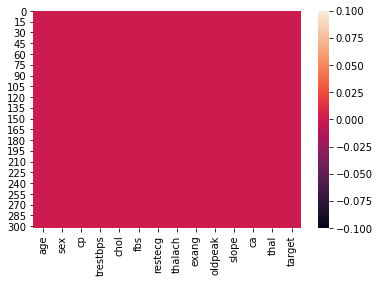

In [202]:
sns.heatmap(df.isnull())

 The data has no null values present in the dataset as the visualization shows.

In [203]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128340,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.378155,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.254161,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134311,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.025190,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.053608,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.023822,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.263384,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.316134,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.341416,0.424510


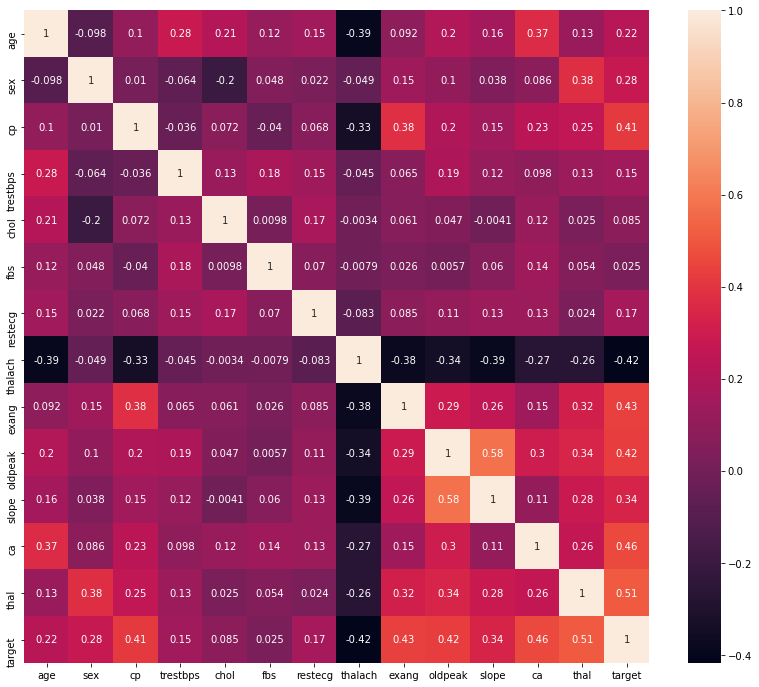

In [204]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

The 'thalach' is most negetively correlated & column 'cp','exang','oldpeak','ca','thal' are positively correlated with the column "target" .

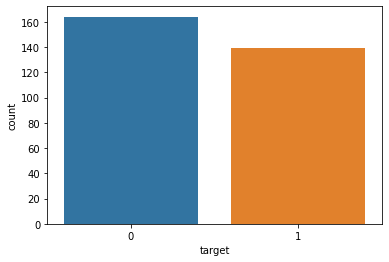

In [205]:
sns.countplot(df['target'])

The 164 rows has no heart disease & The 139 rows have heart disease.

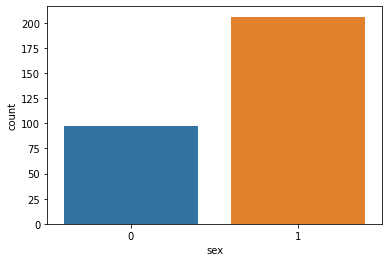

In [206]:
sns.countplot(df['sex'])

sex: The person's sex (1 = male, 0 = female). The data contain mostly male.

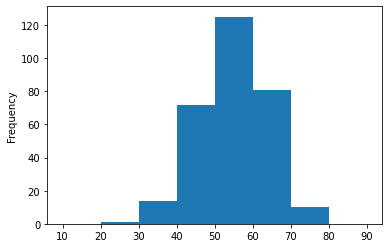

In [207]:
df['age'].plot.hist(bins=([10,20,30,40,50,60,70,80,90]))              

The data has most people belong to 50-60 yr age range.

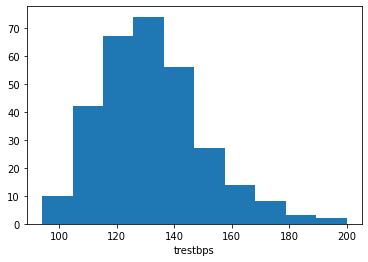

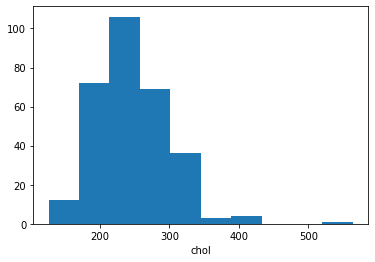

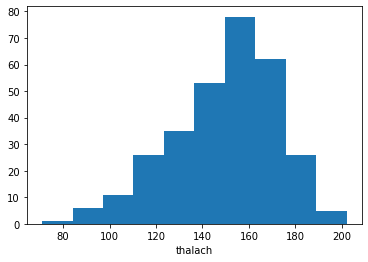

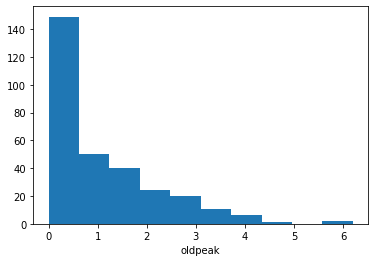

<Figure size 432x288 with 0 Axes>

In [208]:
columns=['trestbps', 'chol', 'thalach','oldpeak']
for i in columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.figure()

* The 'trestbps' is heighst in range 130-140.
* The cholestrol is heighst in range 200-300.
* The thalcal is heighest in range 150-160.
* The 'oldpeak' is heighest in range 0-0.5.

In [209]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


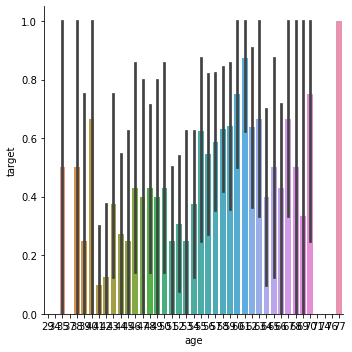

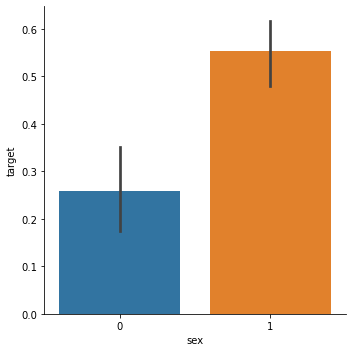

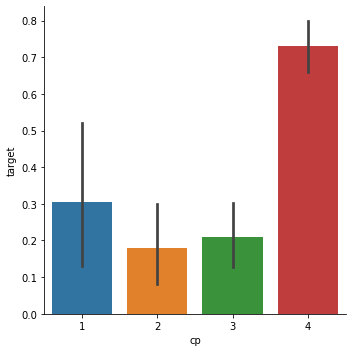

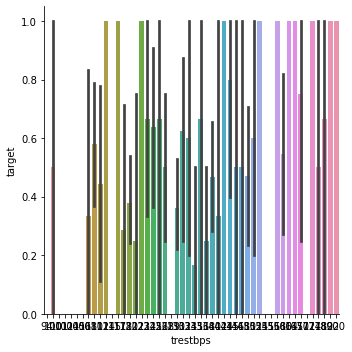

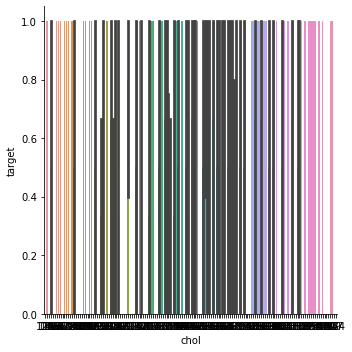

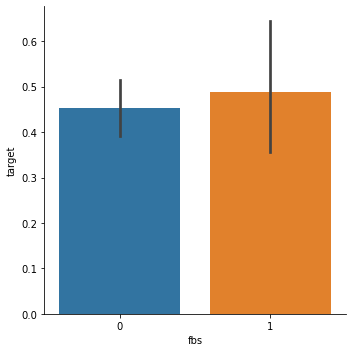

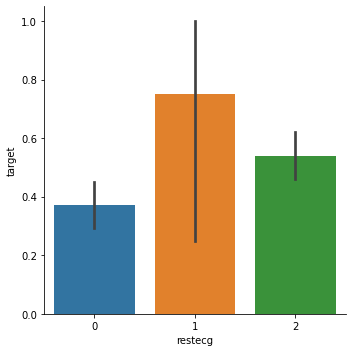

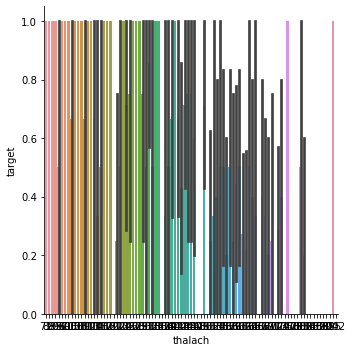

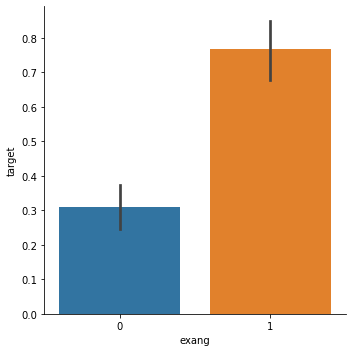

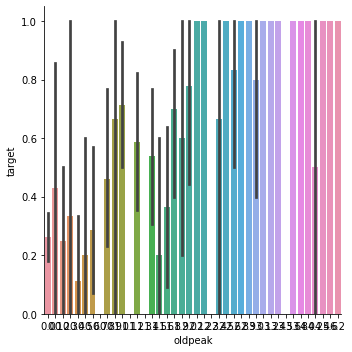

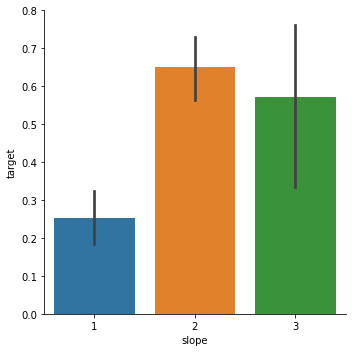

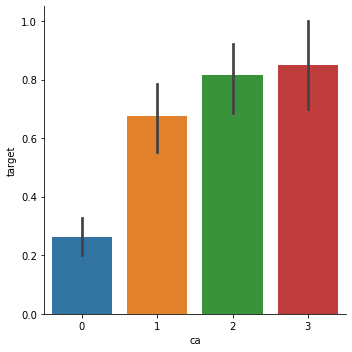

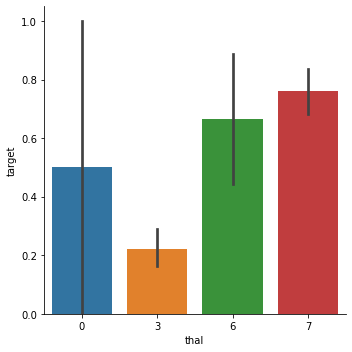

In [212]:
for cols in df.columns:
    if cols!='target': 
        sns.catplot(x=cols,y='target',kind='bar',data=df)

* The  data has highest cp type 4 = asymptotic.
* The  people has heighest in fbs i.e 1 (true).
* The  people has heighest restecg i.e 1 = having ST-T wave abnormality.
* The Exercise induced angina : 1 = yes is heighest.
* The slope is heighest 2=flat.
* The thal is heighest 7 = reversable defect.

In [ ]:
# Outliers

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
ca             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thal           AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

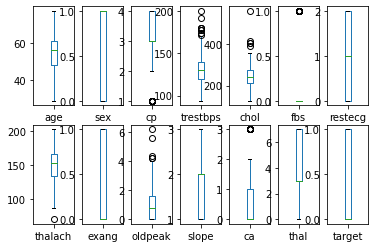

In [213]:
df.plot(kind='box',subplots=True,layout=(2,7))

The boxplot methord shows the dataset has outliers.

In [ ]:
# Checking Skewness

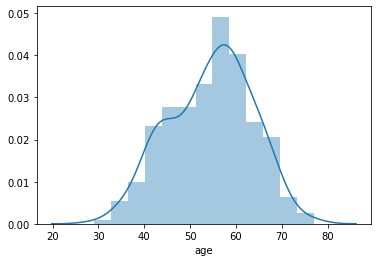

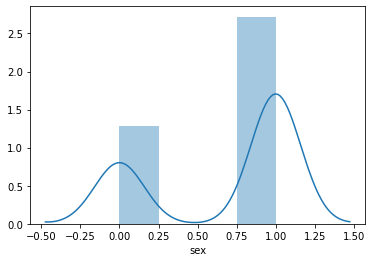

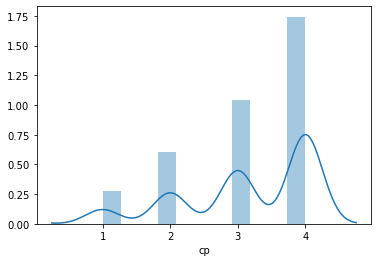

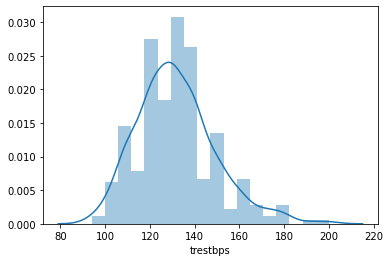

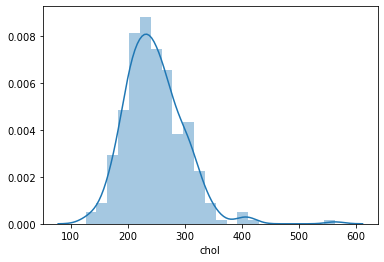

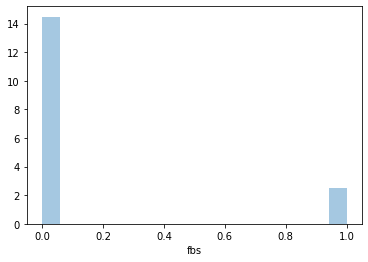

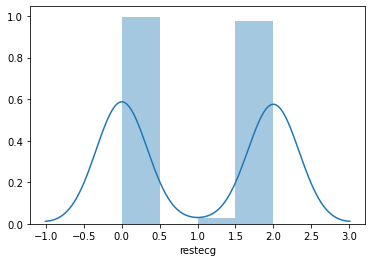

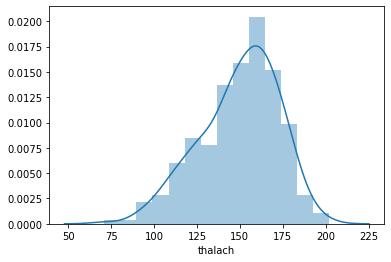

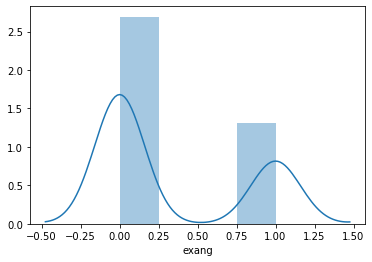

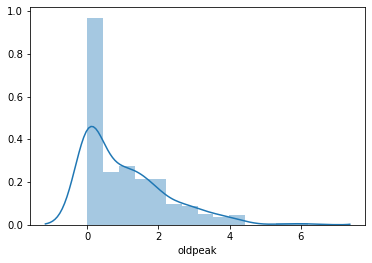

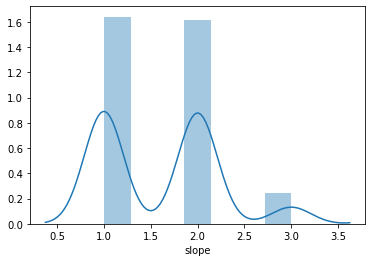

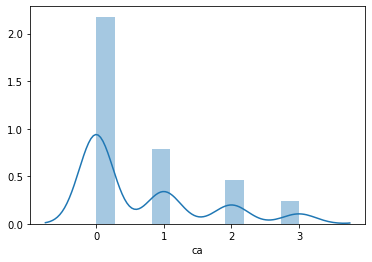

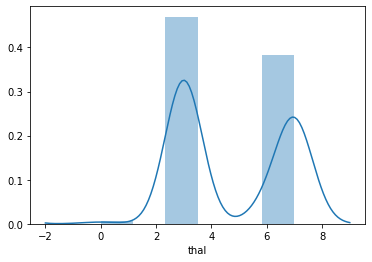

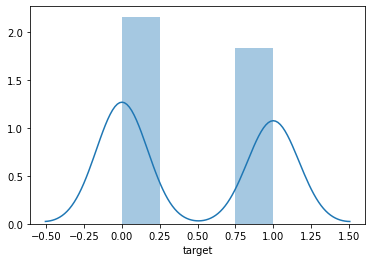

<Figure size 432x288 with 0 Axes>

In [214]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [215]:
df.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.186927
target      0.166406
dtype: float64

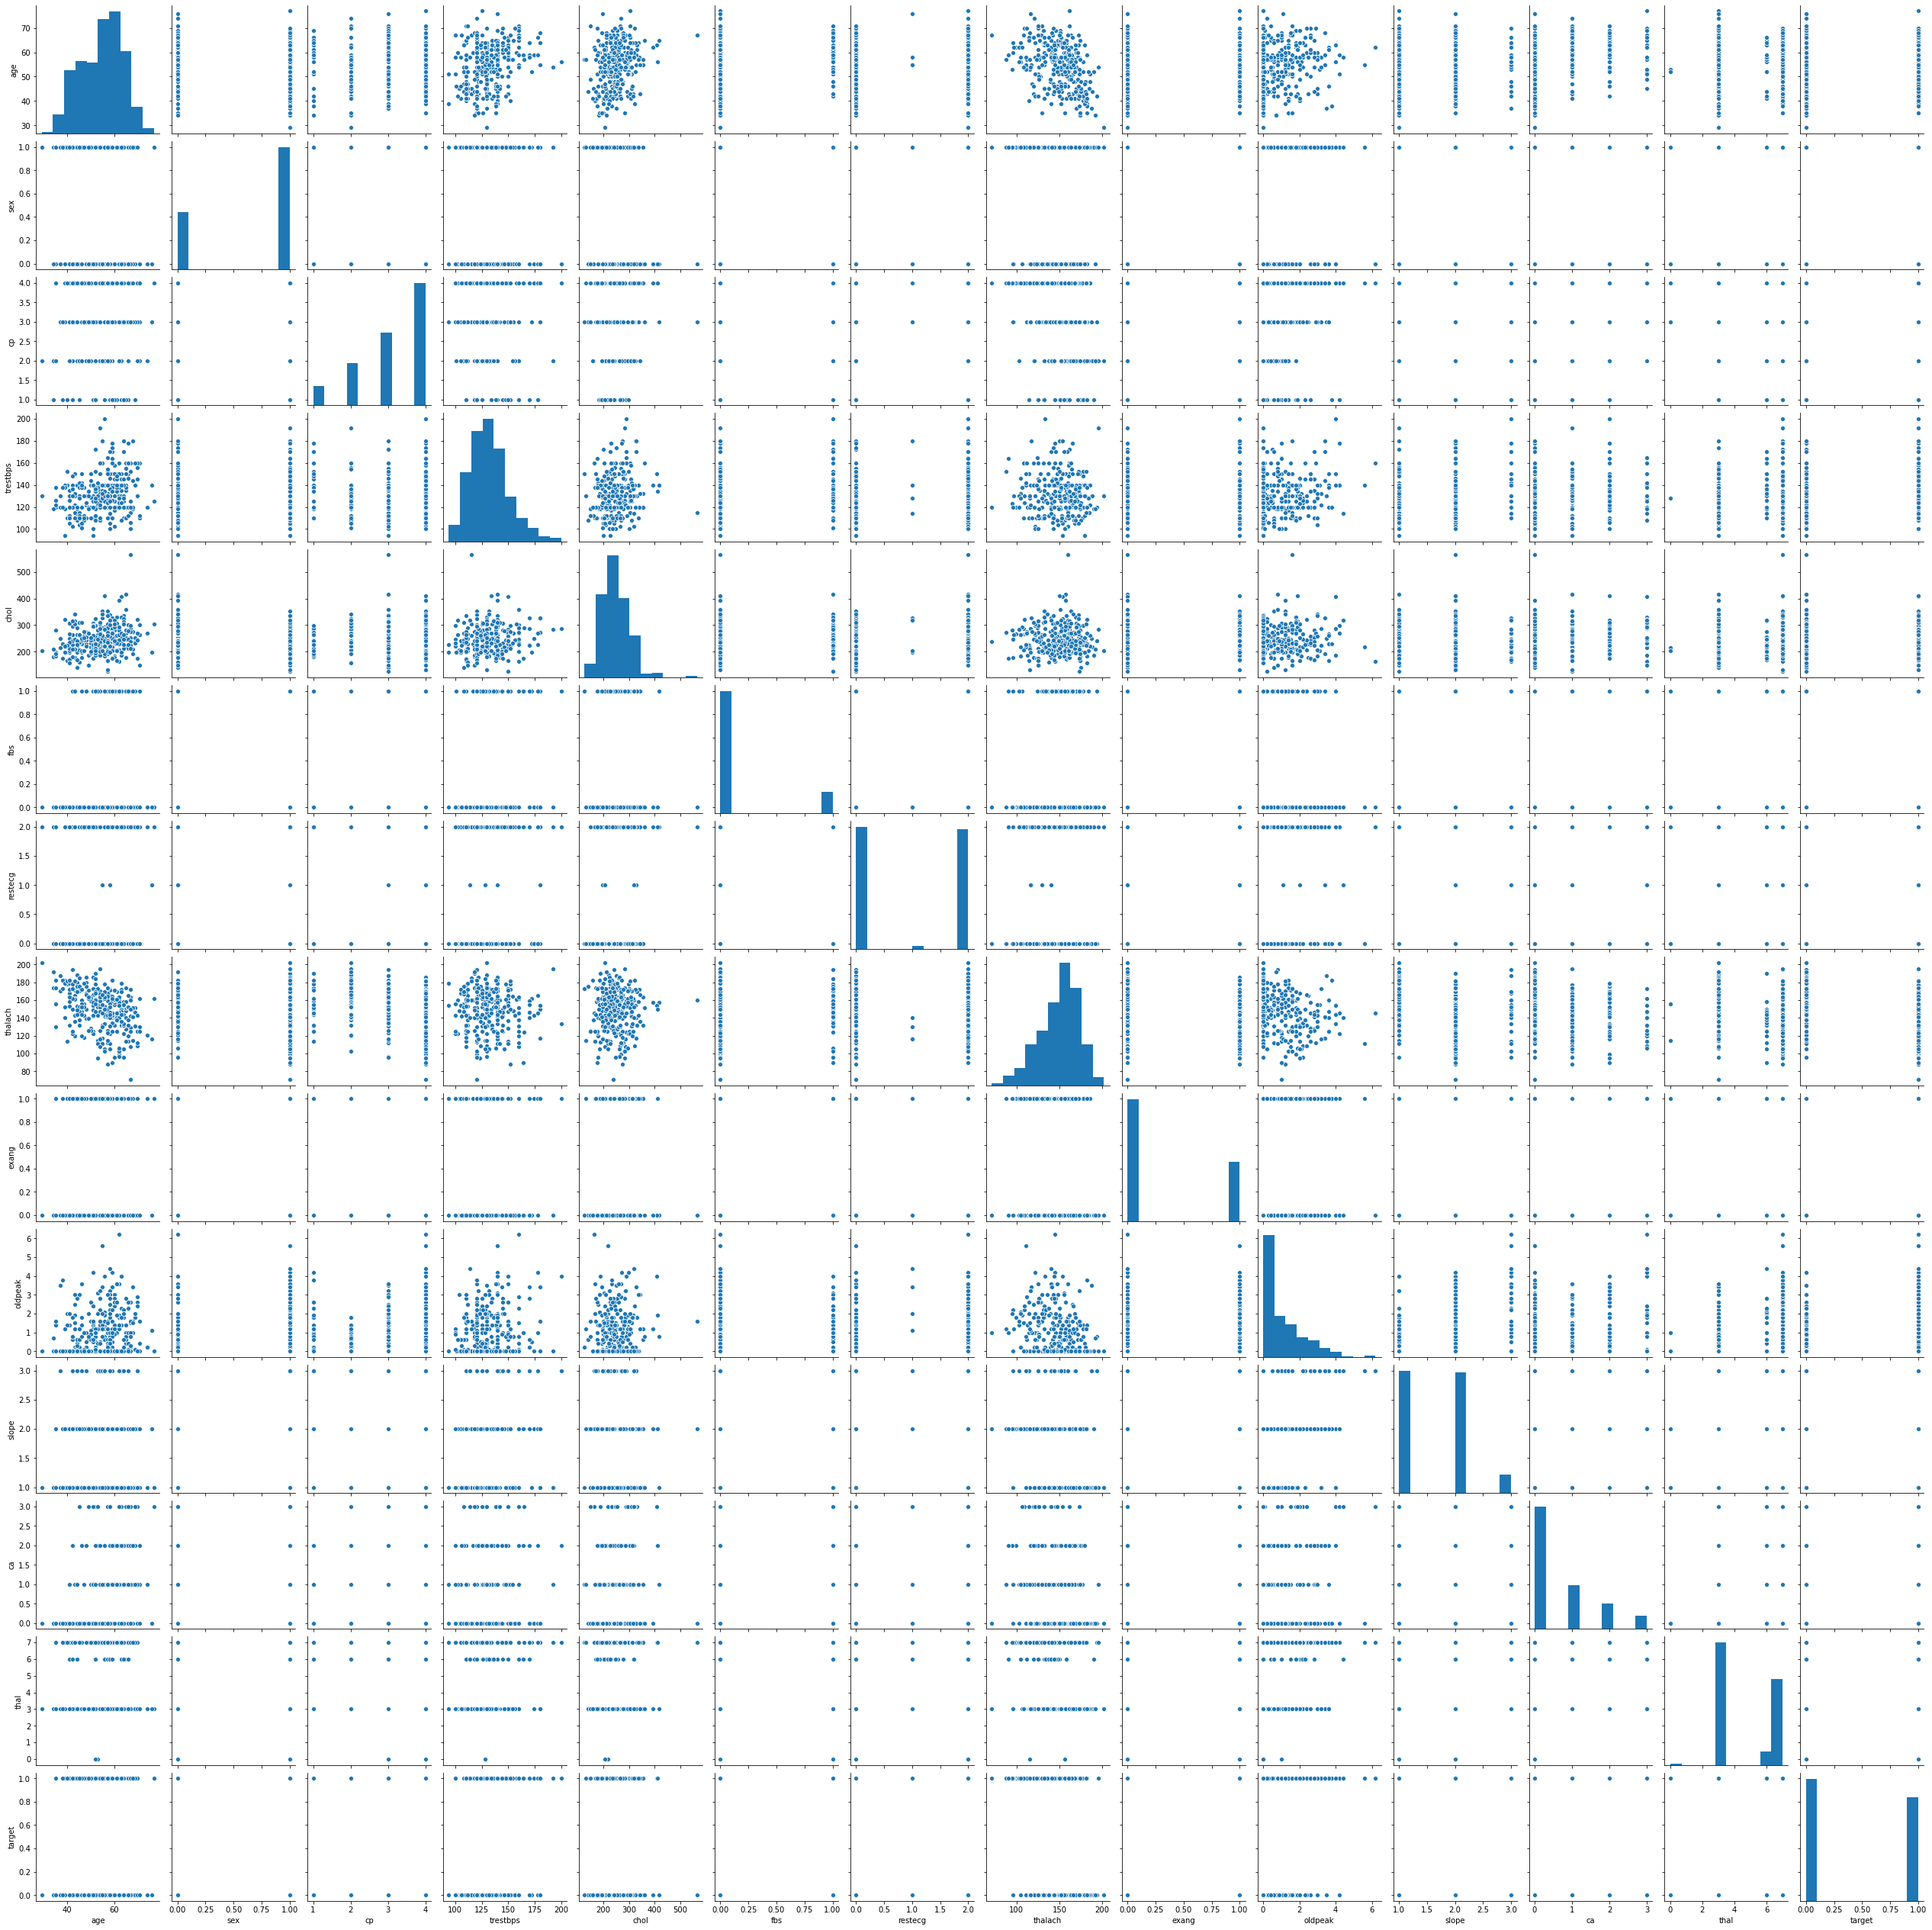

In [216]:
sns.pairplot(df)

The distplot & The pairplot shows that the dataset has skewness. The df.skew() shows the mathematical representation of skewness.

In [217]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.94872647, 0.68620244, 2.25177456, ..., 0.71113139, 0.65913253,
        0.92063075],
       [1.39200191, 0.68620244, 0.87798549, ..., 2.5048807 , 0.86542592,
        1.08621182],
       [1.39200191, 0.68620244, 0.87798549, ..., 1.43287667, 1.16731868,
        1.08621182],
       ...,
       [0.28381332, 0.68620244, 0.87798549, ..., 0.36087264, 1.16731868,
        1.08621182],
       [0.28381332, 1.4572959 , 1.20852121, ..., 0.36087264, 0.86542592,
        1.08621182],
       [1.82174501, 0.68620244, 0.16526786, ..., 0.71113139, 0.86542592,
        0.92063075]])

In [218]:
thresold=3
print(np.where(z>3))

(array([ 48,  91, 121, 123, 126, 152, 181, 188, 245], dtype=int64), array([4, 9, 4, 9, 3, 4, 4, 3, 7], dtype=int64))


In [219]:
df_new=df[(z<3).all(axis=1)]

In [220]:
print(df.shape ,'\t',df_new.shape)

(303, 14) 	 (294, 14)


The outliers are removed from the data.The shape of the data was (303,14) & the new shape is (294,14)

In [221]:
df=df_new

In [222]:
df.skew()

age        -0.179588
sex        -0.828274
cp         -0.824993
trestbps    0.524793
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     1.012591
slope       0.506177
ca          1.246304
thal        0.227140
target      0.206206
dtype: float64

In [223]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[ 0.97014637  0.66953406 -1.78550146 ... -0.80313596  0.74448625
  -0.90267093]
 [ 1.44492855  0.66953406  0.97285297 ...  1.58935504 -0.81582866
   1.10782342]
 [ 1.44492855  0.66953406  0.97285297 ...  1.41714641  1.16085266
   1.10782342]
 ...
 [ 0.27813511  0.66953406  0.97285297 ...  0.99253022  1.16085266
   1.10782342]
 [ 0.27813511 -1.49357599 -1.26574536 ...  0.99253022 -0.81582866
   1.10782342]
 [-1.73501659  0.66953406 -0.37101968 ... -0.80313596 -0.81582866
  -0.90267093]]


The distplot shows the skewness present in the dataset & df.skew() shows the mathematical representation of the skewness present in the dataset.
The skewness is removed with the help of power_transform methord.

In [224]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [225]:
# Model Training

In [226]:
xn=df.iloc[:,0:-1]
xn.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [227]:
y=df['target']
y=pd.DataFrame(data=y)
y.head()

,target
0,0
1,1
2,1
3,0
4,0


In [228]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [231]:
# Standard Scaler is used to scaling the data or normalising.

In [232]:
max_r_score=0;
for r in range (0,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    lg=LogisticRegression()
    lg.fit(x_train,y_train) 
    pred=lg.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy> max_r_score:
        max_r_score=accuracy;
        final_r_state=r;
print('max accuracy score for random state:',final_r_state,"is:",max_r_score)

max accuracy score for random state: 32 is: 0.9076923076923077


In [237]:
# the Logistic Regression model is giving beat result at randaom state at 32.

In [238]:
print(x_train.shape ,'\t',y_train.shape)

(229, 13) 	 (229, 1)


In [239]:
print(x_test.shape ,'\t',y_test.shape)

(65, 13) 	 (65, 1)


In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=32)

In [241]:
lg=LogisticRegression()
lg.fit(x_train,y_train) 
pred=lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pred),'\n')
print('confusion_matrix:','\n',confusion_matrix(y_test,pred),'\n')
print('classification_report:','\n',classification_report(y_test,pred))

accuracy score: 0.9076923076923077 

confusion_matrix: 
 [[33  1]
 [ 5 26]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.96      0.84      0.90        31

    accuracy                           0.91        65
   macro avg       0.92      0.90      0.91        65
weighted avg       0.91      0.91      0.91        65



The Logistic Regression model is giving the accuracy score of 0.9074.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [243]:
from sklearn.svm import SVC

In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
from sklearn.tree import DecisionTreeClassifier

In [246]:
model=[GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()];

In [247]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('accuracy score:',accuracy_score(y_test,predm),'\n')   
    print('confusion_matrix:','\n',confusion_matrix(y_test,predm),'\n')
    print('classification_report:','\n',classification_report(y_test,predm))
    print('**********************************************************************************************************************')
    print('\n')

GaussianNB() 

accuracy score: 0.9076923076923077 

confusion_matrix: 
 [[32  2]
 [ 4 27]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.93      0.87      0.90        31

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.91      0.91      0.91        65

**********************************************************************************************************************


DecisionTreeClassifier() 

accuracy score: 0.6153846153846154 

confusion_matrix: 
 [[24 10]
 [15 16]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.62      0.71      0.66        34
           1       0.62      0.52      0.56        31

    accuracy                           0.62        65
   macro avg       0.62      0.61      0.61        65
weighted avg       0.62      0.6

The SVC model is giving the best accuracy score i.e 0.9076. but still less than Logistic Regression model.

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
parameters={'kernel':['linear','poly','rgf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [252]:
svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predsvc),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predsvc),'\n')
print('classification_report:','\n',classification_report(y_test,predsvc))

accuracy score: 0.9076923076923077 

confusion_matrix: 
 [[33  1]
 [ 5 26]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.96      0.84      0.90        31

    accuracy                           0.91        65
   macro avg       0.92      0.90      0.91        65
weighted avg       0.91      0.91      0.91        65



The GridSearchCV model is used for Hypertunning the SVC model to check if it give the best result i.e 0.9076.

In [262]:
#Ensemble Techniques

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
rf=RandomForestClassifier(n_estimators=100,random_state=32)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

1.0

In [255]:
print('accuracy score:',accuracy_score(y_test,predrf),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predrf),'\n')
print('classification_report:','\n',classification_report(y_test,predrf))

accuracy score: 0.8923076923076924 

confusion_matrix: 
 [[33  1]
 [ 6 25]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.96      0.81      0.88        31

    accuracy                           0.89        65
   macro avg       0.90      0.89      0.89        65
weighted avg       0.90      0.89      0.89        65



RandomForestClassifier model  accuracy score is 0.8923.

In [256]:
from sklearn.ensemble import AdaBoostClassifier

In [257]:
ada=AdaBoostClassifier(base_estimator=svc,n_estimators=100,random_state=32,algorithm='SAMME')
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.8296943231441049

In [258]:
print('accuracy score:',accuracy_score(y_test,predada),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predada),'\n')
print('classification_report:','\n',classification_report(y_test,predada))

accuracy score: 0.9230769230769231 

confusion_matrix: 
 [[33  1]
 [ 4 27]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.96      0.87      0.92        31

    accuracy                           0.92        65
   macro avg       0.93      0.92      0.92        65
weighted avg       0.93      0.92      0.92        65



The AdaBoostClassifier is used on the SVC model to get the best score i.e 0.9230.

In [259]:
from sklearn.model_selection import cross_val_score

In [260]:
svcscore=cross_val_score(ada,x,y,cv=5)
print(svcscore)

[0.83050847 0.91525424 0.79661017 0.88135593 0.75862069]


In [261]:
print(svcscore.mean(),svcscore.std())

0.8364699006428988 0.056403127483320596


The SVC model is cross validated to overcome underfitting & overfitting.

In [263]:
from sklearn.metrics import roc_auc_score,roc_curve

In [264]:
fpr,tpr,thresolds=roc_curve(y_test,predada)

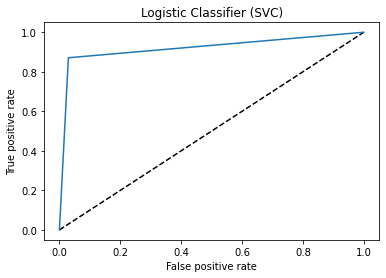

In [265]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Classifier (SVC)')
plt.show()

The ROC curve is used to represented the y_test and predicted data.

In [266]:
import joblib

In [267]:
joblib.dump(ada,'titanic_dataset.pkl')

['titanic_dataset.pkl']